<a href="https://colab.research.google.com/github/AnveshAnnepaga/AI_DS/blob/main/K_Means_Clusttering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
X = df.iloc[:,3:].values


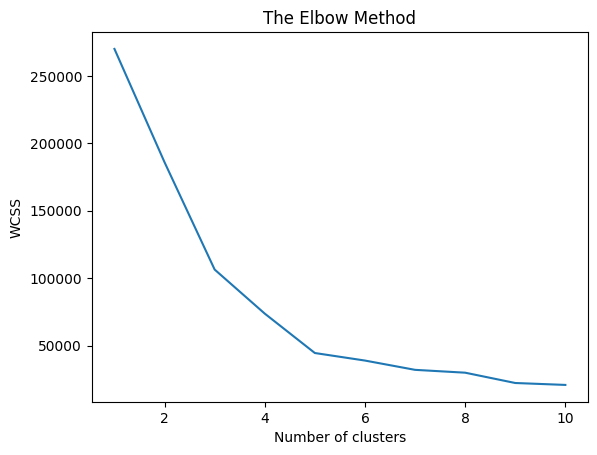

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

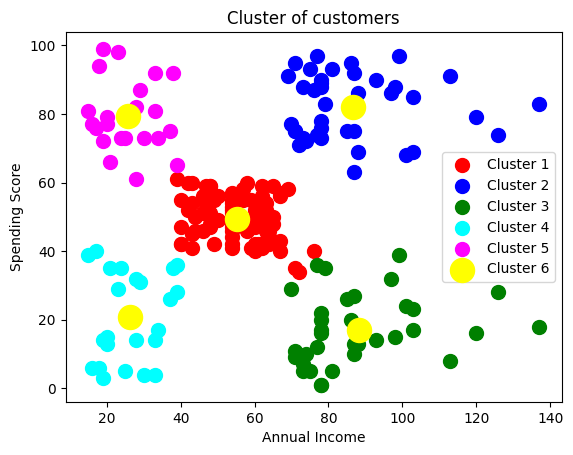

In [10]:
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label ='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label ='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label ='Cluster 4')
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label ='Cluster 1')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='magenta',label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label = 'Cluster 6')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# **Wholesale Customer Segmentation Dashboard**

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
df = pd.read_csv("/content/drive/MyDrive/Wholesale customers data.csv")

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [15]:
X = df[[
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen"
]]


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


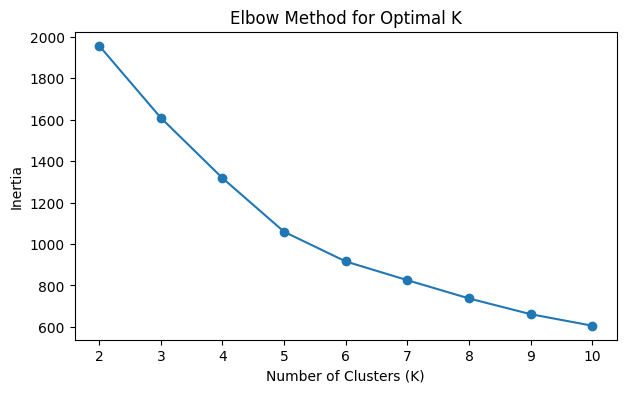

In [17]:
inertia = []

K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [18]:
for k in range(2, 7):
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.547
K=3, Silhouette Score=0.548
K=4, Silhouette Score=0.348
K=5, Silhouette Score=0.369
K=6, Silhouette Score=0.378


In [19]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


In [20]:
df["Cluster"].value_counts()


,count
Cluster,
0,270
3,96
2,63
1,10
4,1


In [21]:
cluster_profile = df.groupby("Cluster")[[
    "Fresh",
    "Milk",
    "Grocery",
    "Frozen",
    "Detergents_Paper",
    "Delicassen"
]].mean()

cluster_profile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
3,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000


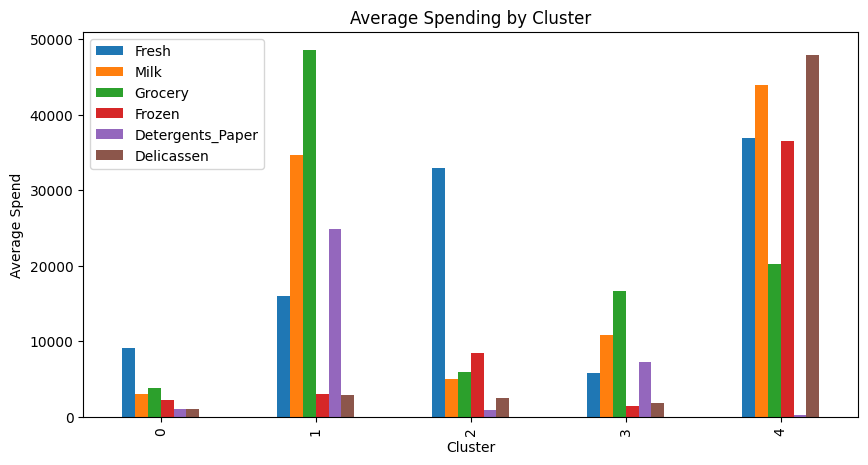

In [22]:
cluster_profile.plot(kind="bar", figsize=(10,5))
plt.title("Average Spending by Cluster")
plt.ylabel("Average Spend")
plt.show()


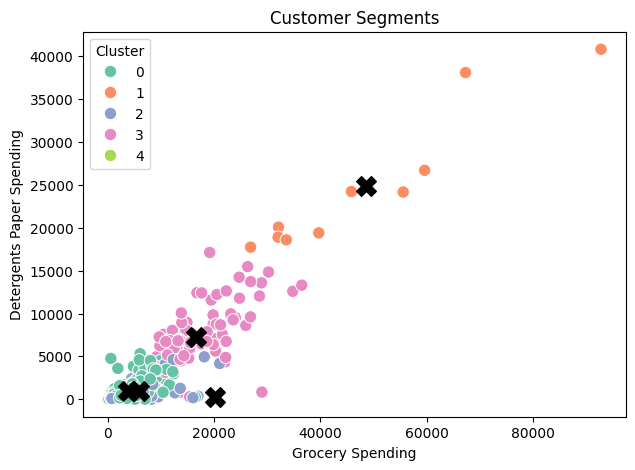

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["Grocery"],
    y=df["Detergents_Paper"],
    hue=df["Cluster"],
    palette="Set2",
    s=80
)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(
    centers[:, 2],  # Grocery
    centers[:, 4],  # Detergents_Paper
    c="black",
    s=200,
    marker="X"
)

plt.xlabel("Grocery Spending")
plt.ylabel("Detergents Paper Spending")
plt.title("Customer Segments")
plt.show()


In [24]:
kmeans_2 = KMeans(n_clusters=3, random_state=99, n_init=10)
labels_2 = kmeans_2.fit_predict(X_scaled)

np.mean(df["Cluster"] == labels_2)


np.float64(0.6136363636363636)